# Feedforward Neural Network
This notebook implements a simple yet effective FNN model.

In [ ]:
# Installazione di tutti i pacchetti necessari
!pip install numpy pandas matplotlib scikit-learn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 154.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.7 MB/s eta 0:00:00


## 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 2. Load Pre-processed Data

In [ ]:
X_train_scaled = pd.read_csv('X_train_scaled.csv').values
y_train = pd.read_csv('y_train.csv').values
X_test_scaled = pd.read_csv('X_test_scaled.csv').values
y_test = pd.read_csv('y_test.csv').values

## 3. Build Feedforward Neural Network

In [ ]:
dropout = 0.7

def build_fnn_model(input_dim, learning_rate=0.001):
    """
    Build a Feedforward Neural Network

    Args:
        input_dim: Number of input features
        learning_rate: Learning rate for optimizer

    Returns:
        Compiled Keras model
    """
    model = Sequential([
        # Input layer
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(32, activation='relu'),

        # Output layer (regression)
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss = tf.keras.losses.Huber(delta=1.0),  # Use Huber as loss,
        metrics=['mae', 'mse']
    )

    return model


## 4. Setup Callbacks

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'checkpoint/best_fnn_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

## 5. Train the Model

In [ ]:
input_dim = X_train_scaled.shape[1]

model = build_fnn_model(input_dim)
# print(model.summary())

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

Epoch 1/200
556/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.5416 - mae: 24.0033 - mse: 2081.4878
Epoch 1: val_loss did not improve from 1.55095
556/556 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 23.5415 - mae: 24.0031 - mse: 2081.4753 - val_loss: 18.9487 - val_mae: 19.4392 - val_mse: 1438.6630 - learning_rate: 0.0010
Epoch 2/200
554/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.4682 - mae: 23.9446 - mse: 2080.7234
Epoch 2: val_loss did not improve from 1.55095
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 23.4679 - mae: 23.9444 - mse: 2080.7131 - val_loss: 18.9562 - val_mae: 19.4380 - val_mse: 1448.0870 - learning_rate: 0.0010
Epoch 3/200
551/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.4538 - mae: 23.9328 - mse: 2080.4504
Epoch 3: val_loss did not improve from 1.55095
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 23.4532 - mae: 23.9323 - mse: 2080.3774 - val_loss: 18.9413 - val_mae: 19.4285 - val_mse: 1443.9570 - learning_rate: 0.0010
Epoch 4/200
551/556 ━━━━━━━━━━━━━━━

556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.6658 - mae: 5.0238 - mse: 91.7387 - val_loss: 1.4424 - val_mae: 1.7898 - val_mse: 9.4936 - learning_rate: 0.0010
Epoch 31/200
554/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5840 - mae: 4.9350 - mse: 88.7127
Epoch 31: val_loss did not improve from 1.44245
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.5841 - mae: 4.9351 - mse: 88.7161 - val_loss: 1.7379 - val_mae: 2.0890 - val_mse: 14.7197 - learning_rate: 0.0010
Epoch 32/200
554/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6492 - mae: 5.0048 - mse: 93.3413
Epoch 32: val_loss did not improve from 1.44245
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.6489 - mae: 5.0045 - mse: 93.3285 - val_loss: 1.7698 - val_mae: 2.1224 - val_mse: 13.4632 - learning_rate: 0.0010
Epoch 33/200
554/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6025 - mae: 4.9643 - mse: 88.8306
Epoch 33: val_loss did not improve from 1.44245
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.6024 - mae: 4.964

556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.1982 - mae: 4.5441 - mse: 76.8039 - val_loss: 1.4357 - val_mae: 1.7709 - val_mse: 9.1452 - learning_rate: 5.0000e-04
Epoch 43/200
553/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1470 - mae: 4.4932 - mse: 78.7802
Epoch 43: val_loss did not improve from 1.43565
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.1468 - mae: 4.4930 - mse: 78.7592 - val_loss: 1.5397 - val_mae: 1.8738 - val_mse: 10.2952 - learning_rate: 5.0000e-04
Epoch 44/200
553/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1822 - mae: 4.5283 - mse: 76.8607
Epoch 44: val_loss did not improve from 1.43565
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.1818 - mae: 4.5279 - mse: 76.8473 - val_loss: 1.5319 - val_mae: 1.8630 - val_mse: 9.7078 - learning_rate: 5.0000e-04
Epoch 45/200
552/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0944 - mae: 4.4366 - mse: 71.8768
Epoch 45: val_loss improved from 1.43565 to 1.42587, saving model to checkpoint/best_fnn_model.h5


556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.0945 - mae: 4.4367 - mse: 71.8886 - val_loss: 1.4259 - val_mae: 1.7423 - val_mse: 9.0569 - learning_rate: 5.0000e-04
Epoch 46/200
555/556 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0261 - mae: 4.3657 - mse: 70.2809
Epoch 46: val_loss did not improve from 1.42587
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.0261 - mae: 4.3657 - mse: 70.2801 - val_loss: 1.4511 - val_mae: 1.7841 - val_mse: 9.3366 - learning_rate: 5.0000e-04
Epoch 47/200
556/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0655 - mae: 4.4086 - mse: 73.1363
Epoch 47: val_loss did not improve from 1.42587
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 4.0655 - mae: 4.4086 - mse: 73.1356 - val_loss: 1.6572 - val_mae: 1.9918 - val_mse: 10.8366 - learning_rate: 5.0000e-04
Epoch 48/200
554/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0672 - mae: 4.4138 - mse: 72.0979
Epoch 48: val_loss did not improve from 1.42587
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.0669 -

556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.9882 - mae: 4.3338 - mse: 69.7147 - val_loss: 1.3679 - val_mae: 1.7039 - val_mse: 8.4101 - learning_rate: 5.0000e-04
Epoch 50/200
551/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0093 - mae: 4.3532 - mse: 67.7206
Epoch 50: val_loss improved from 1.36790 to 1.29887, saving model to checkpoint/best_fnn_model.h5


556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.0092 - mae: 4.3531 - mse: 67.7277 - val_loss: 1.2989 - val_mae: 1.6239 - val_mse: 8.2166 - learning_rate: 5.0000e-04
Epoch 51/200
555/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9444 - mae: 4.2870 - mse: 70.1176
Epoch 51: val_loss did not improve from 1.29887
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.9444 - mae: 4.2870 - mse: 70.1113 - val_loss: 1.3985 - val_mae: 1.7317 - val_mse: 8.6803 - learning_rate: 5.0000e-04
Epoch 52/200
550/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8913 - mae: 4.2375 - mse: 64.4613
Epoch 52: val_loss did not improve from 1.29887
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.8913 - mae: 4.2374 - mse: 64.4611 - val_loss: 1.4113 - val_mae: 1.7354 - val_mse: 8.9742 - learning_rate: 5.0000e-04
Epoch 53/200
555/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8669 - mae: 4.2106 - mse: 63.5831
Epoch 53: val_loss did not improve from 1.29887
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.8669 - 

556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.8140 - mae: 4.1600 - mse: 64.1751 - val_loss: 1.2976 - val_mae: 1.6249 - val_mse: 8.5702 - learning_rate: 5.0000e-04
Epoch 56/200
552/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7594 - mae: 4.1088 - mse: 61.7682
Epoch 56: val_loss did not improve from 1.29764
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.7599 - mae: 4.1093 - mse: 61.7891 - val_loss: 1.3482 - val_mae: 1.6801 - val_mse: 9.1576 - learning_rate: 5.0000e-04
Epoch 57/200
551/556 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7700 - mae: 4.1172 - mse: 64.5846
Epoch 57: val_loss did not improve from 1.29764
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.7701 - mae: 4.1173 - mse: 64.5726 - val_loss: 1.3418 - val_mae: 1.6572 - val_mse: 8.3299 - learning_rate: 5.0000e-04
Epoch 58/200
550/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7474 - mae: 4.0895 - mse: 61.5524
Epoch 58: val_loss did not improve from 1.29764
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.7475 - 

556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.7719 - mae: 4.1190 - mse: 62.5512 - val_loss: 1.2287 - val_mae: 1.5482 - val_mse: 8.4553 - learning_rate: 5.0000e-04
Epoch 62/200
553/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7399 - mae: 4.0820 - mse: 62.0932
Epoch 62: val_loss did not improve from 1.22874
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.7402 - mae: 4.0822 - mse: 62.0968 - val_loss: 1.3389 - val_mae: 1.6743 - val_mse: 9.3187 - learning_rate: 5.0000e-04
Epoch 63/200
552/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7124 - mae: 4.0585 - mse: 61.3736
Epoch 63: val_loss did not improve from 1.22874
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.7123 - mae: 4.0584 - mse: 61.3664 - val_loss: 1.4306 - val_mae: 1.7755 - val_mse: 9.2542 - learning_rate: 5.0000e-04
Epoch 64/200
552/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7011 - mae: 4.0473 - mse: 60.8196
Epoch 64: val_loss did not improve from 1.22874
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.7011 - 

556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.6082 - mae: 3.9477 - mse: 58.2327 - val_loss: 1.2251 - val_mae: 1.5481 - val_mse: 8.1035 - learning_rate: 2.5000e-04
Epoch 73/200
551/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5427 - mae: 3.8829 - mse: 57.6215
Epoch 73: val_loss improved from 1.22506 to 1.21559, saving model to checkpoint/best_fnn_model.h5


556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.5431 - mae: 3.8833 - mse: 57.6255 - val_loss: 1.2156 - val_mae: 1.5371 - val_mse: 7.6684 - learning_rate: 2.5000e-04
Epoch 74/200
550/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5299 - mae: 3.8687 - mse: 55.8871
Epoch 74: val_loss did not improve from 1.21559
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.5303 - mae: 3.8691 - mse: 55.9044 - val_loss: 1.3595 - val_mae: 1.6916 - val_mse: 8.7566 - learning_rate: 2.5000e-04
Epoch 75/200
556/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5131 - mae: 3.8508 - mse: 54.7298
Epoch 75: val_loss improved from 1.21559 to 1.18519, saving model to checkpoint/best_fnn_model.h5


556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.5131 - mae: 3.8508 - mse: 54.7327 - val_loss: 1.1852 - val_mae: 1.5104 - val_mse: 7.5674 - learning_rate: 2.5000e-04
Epoch 76/200
554/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5934 - mae: 3.9328 - mse: 56.8766
Epoch 76: val_loss did not improve from 1.18519
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.5932 - mae: 3.9326 - mse: 56.8742 - val_loss: 1.2028 - val_mae: 1.5269 - val_mse: 7.5106 - learning_rate: 2.5000e-04
Epoch 77/200
550/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4523 - mae: 3.7933 - mse: 53.4271
Epoch 77: val_loss did not improve from 1.18519
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.4529 - mae: 3.7939 - mse: 53.4447 - val_loss: 1.4084 - val_mae: 1.7327 - val_mse: 10.5584 - learning_rate: 2.5000e-04
Epoch 78/200
552/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4909 - mae: 3.8335 - mse: 54.6005
Epoch 78: val_loss did not improve from 1.18519
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.4911 -

556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.4906 - mae: 3.8274 - mse: 56.5371 - val_loss: 1.1397 - val_mae: 1.4609 - val_mse: 7.0620 - learning_rate: 2.5000e-04
Epoch 84/200
552/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4340 - mae: 3.7705 - mse: 53.7206
Epoch 84: val_loss did not improve from 1.13970
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.4341 - mae: 3.7706 - mse: 53.7094 - val_loss: 1.1567 - val_mae: 1.4765 - val_mse: 6.9925 - learning_rate: 2.5000e-04
Epoch 85/200
552/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3910 - mae: 3.7269 - mse: 51.0931
Epoch 85: val_loss did not improve from 1.13970
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.3914 - mae: 3.7274 - mse: 51.1023 - val_loss: 1.1974 - val_mae: 1.5116 - val_mse: 7.5911 - learning_rate: 2.5000e-04
Epoch 86/200
555/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4489 - mae: 3.7843 - mse: 54.6956
Epoch 86: val_loss did not improve from 1.13970
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.4490 - 

556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.4301 - mae: 3.7658 - mse: 55.2777 - val_loss: 1.1163 - val_mae: 1.4294 - val_mse: 6.7753 - learning_rate: 2.5000e-04
Epoch 90/200
556/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4082 - mae: 3.7470 - mse: 51.5573
Epoch 90: val_loss did not improve from 1.11626
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.4083 - mae: 3.7470 - mse: 51.5596 - val_loss: 1.2873 - val_mae: 1.6107 - val_mse: 9.0089 - learning_rate: 2.5000e-04
Epoch 91/200
555/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4399 - mae: 3.7788 - mse: 55.6605
Epoch 91: val_loss did not improve from 1.11626
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.4399 - mae: 3.7788 - mse: 55.6568 - val_loss: 1.2609 - val_mae: 1.5832 - val_mse: 8.6062 - learning_rate: 2.5000e-04
Epoch 92/200
552/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4101 - mae: 3.7466 - mse: 53.8667
Epoch 92: val_loss did not improve from 1.11626
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.4100 - 

556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.2939 - mae: 3.6282 - mse: 48.9151 - val_loss: 1.0991 - val_mae: 1.4070 - val_mse: 7.0625 - learning_rate: 1.2500e-04
Epoch 104/200
555/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3189 - mae: 3.6545 - mse: 49.8764
Epoch 104: val_loss did not improve from 1.09915
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.3188 - mae: 3.6545 - mse: 49.8747 - val_loss: 1.1029 - val_mae: 1.4094 - val_mse: 6.9934 - learning_rate: 1.2500e-04
Epoch 105/200
554/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2518 - mae: 3.5864 - mse: 46.9996
Epoch 105: val_loss did not improve from 1.09915
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.2520 - mae: 3.5866 - mse: 47.0075 - val_loss: 1.1856 - val_mae: 1.4981 - val_mse: 8.0353 - learning_rate: 1.2500e-04
Epoch 106/200
551/556 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2724 - mae: 3.6068 - mse: 47.7878
Epoch 106: val_loss did not improve from 1.09915
556/556 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.2

## 6. Training Visualization

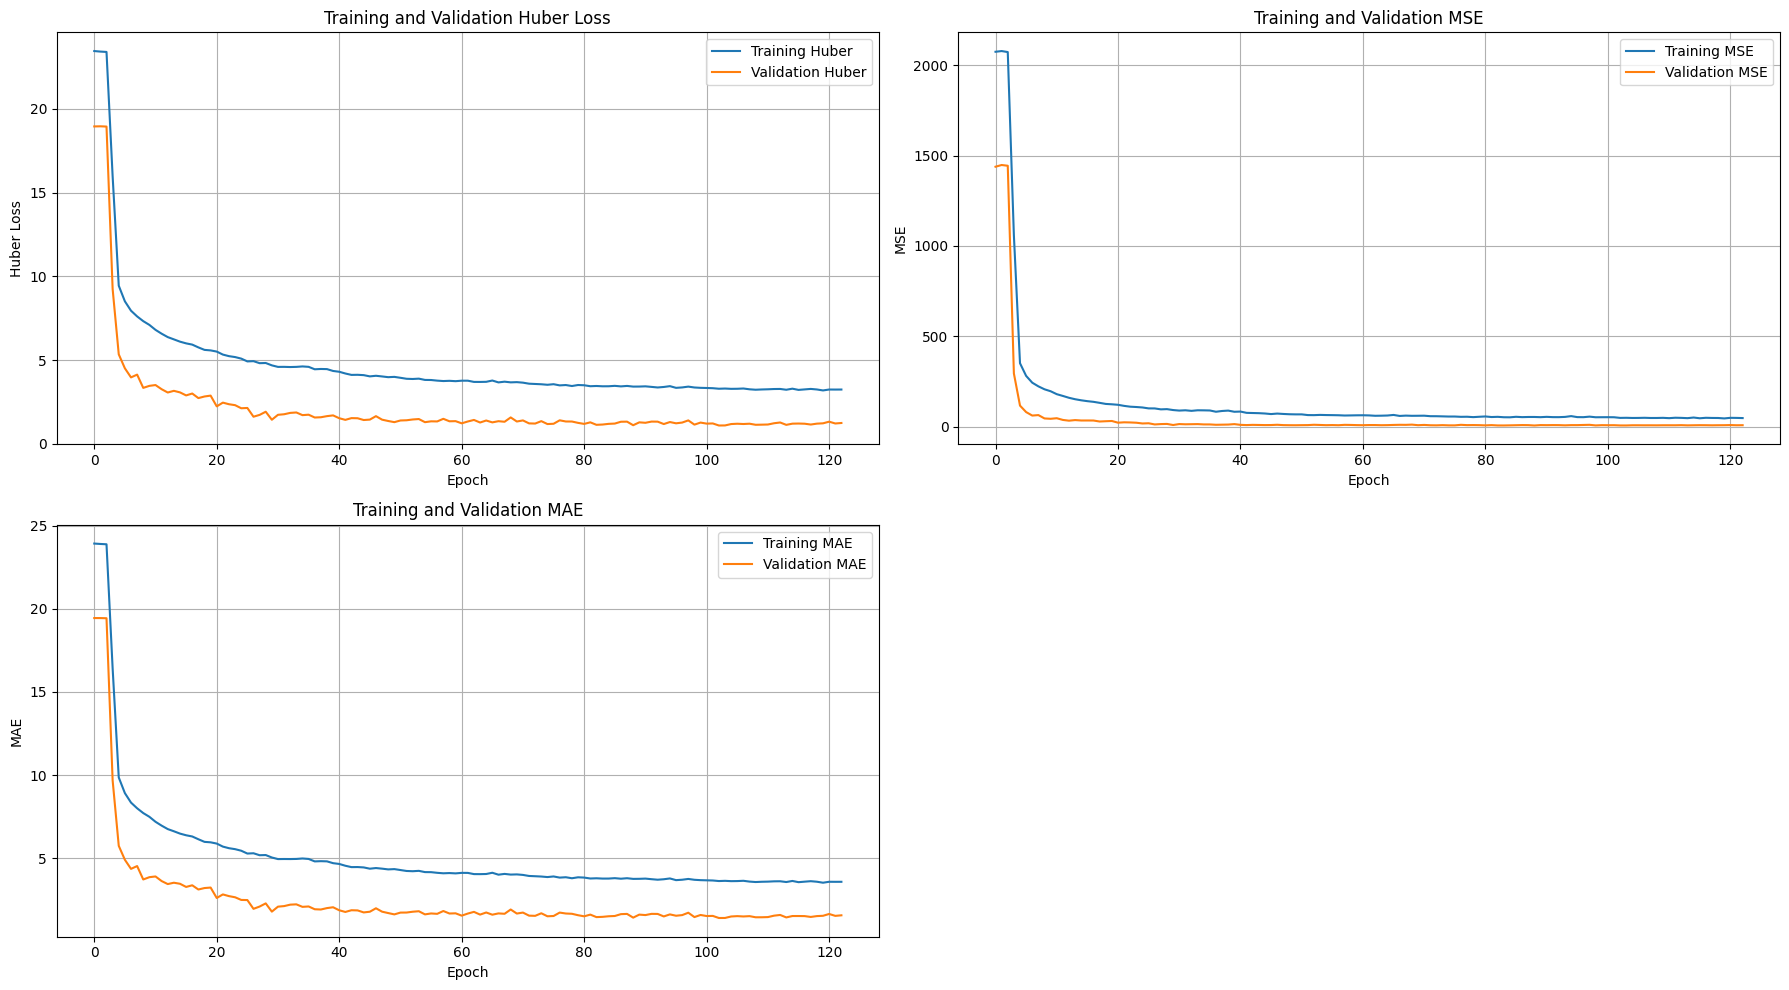

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))  # 2 rows, 2 columns

# Huber Loss curves
axes[0, 0].plot(history.history['loss'], label='Training Huber')
axes[0, 0].plot(history.history['val_loss'], label='Validation Huber')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Huber Loss')
axes[0, 0].set_title('Training and Validation Huber Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# MSE curves
axes[0, 1].plot(history.history['mse'], label='Training MSE')
axes[0, 1].plot(history.history['val_mse'], label='Validation MSE')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_title('Training and Validation MSE')
axes[0, 1].legend()
axes[0, 1].grid(True)

# MAE curves
axes[1, 0].plot(history.history['mae'], label='Training MAE')
axes[1, 0].plot(history.history['val_mae'], label='Validation MAE')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_title('Training and Validation MAE')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Hide the unused subplot (bottom right)
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('fnn_results.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Evaluate the Model

In [ ]:
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# Custom accuracy within tolerance
tolerance = 0.10  # 10% tolerance

# Training metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)


# Testing metrics
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)


print("\n" + "="*60)
print("FEEDFORWARD NEURAL NETWORK - RESULTS")
print("="*60)
print(f"\nTraining Set:")
print(f"  MSE:  {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")

print(f"\nTest Set:")
print(f"  MSE:  {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")
print("="*60)

1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

FEEDFORWARD NEURAL NETWORK - RESULTS

Training Set:
  MSE:  12.8508
  RMSE: 3.5848
  MAE:  1.7264
  R²:   0.9913

Test Set:
  MSE:  6.7582
  RMSE: 2.5997
  MAE:  1.3733
  R²:   0.9939


Plotting Evaluation

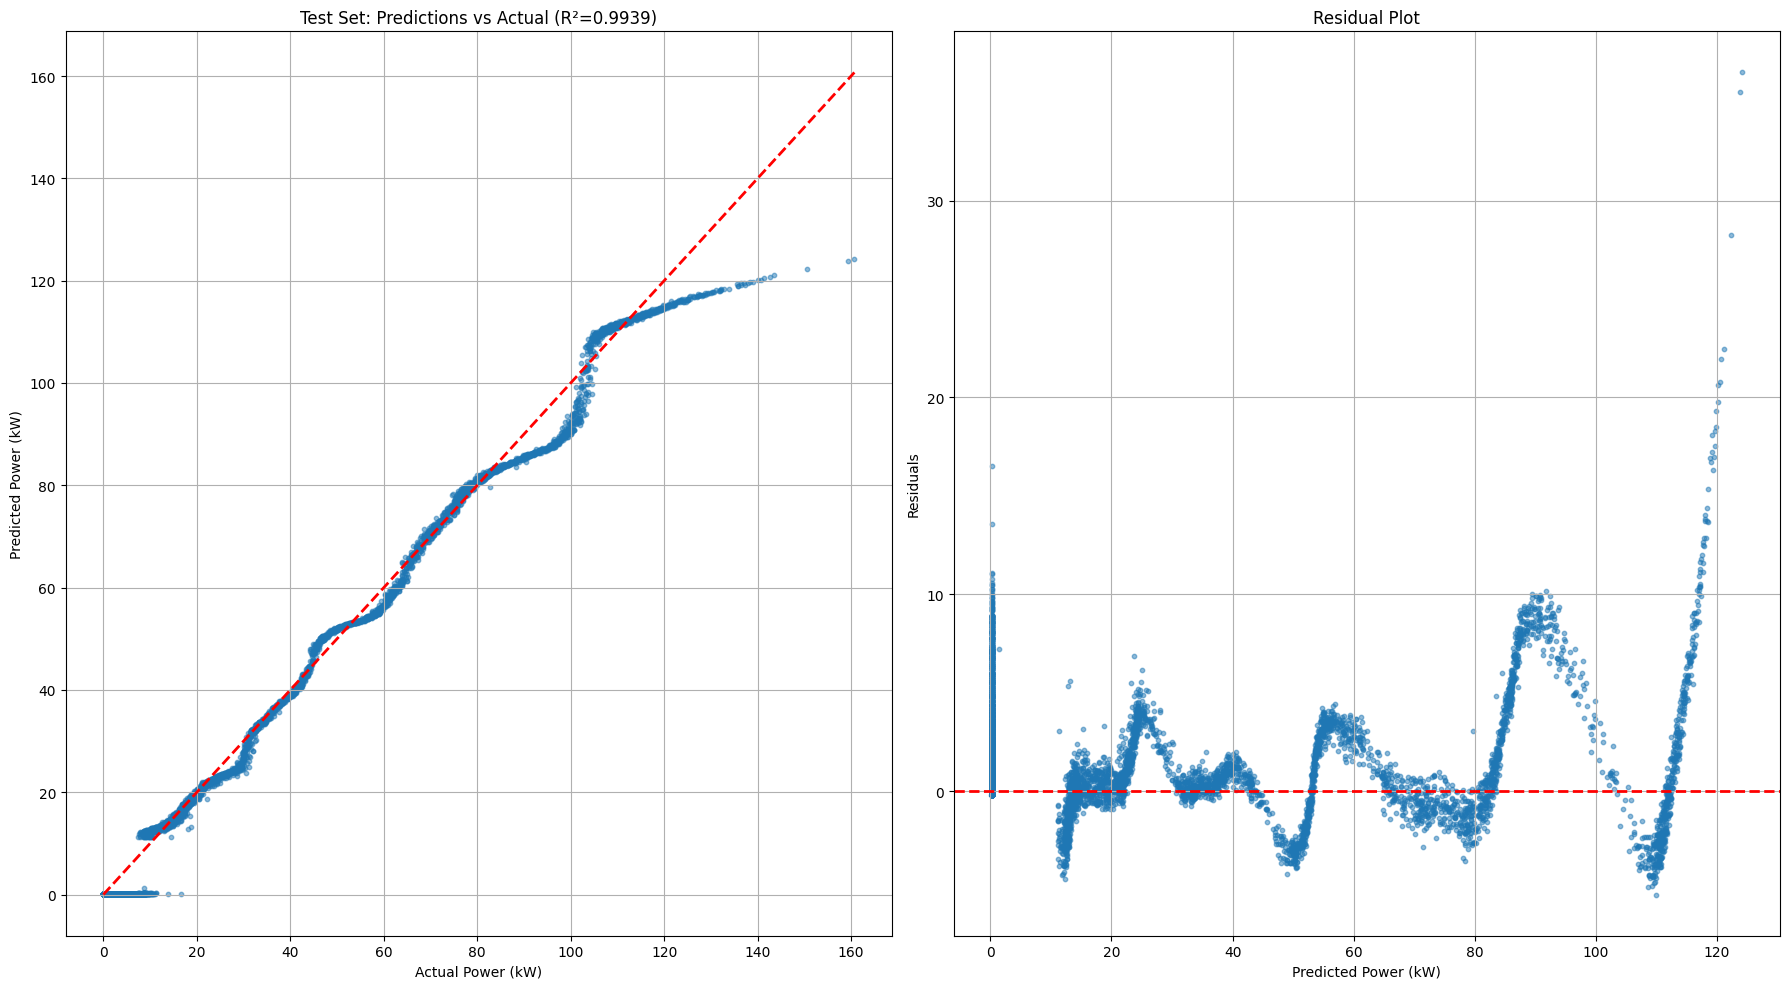

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))  # 1 rows, 2 columns

# Predictions vs Actual (Test Set)
axes[0].scatter(y_test, y_pred_test, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Power (kW)')
axes[0].set_ylabel('Predicted Power (kW)')
axes[0].set_title(f'Test Set: Predictions vs Actual (R²={test_r2:.4f})')
axes[0].grid(True)

# Residuals plot
y_test_flat = y_test.flatten()
y_pred_test_flat = y_pred_test.flatten()
residuals = y_test_flat - y_pred_test_flat
axes[1].scatter(y_pred_test_flat, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Power (kW)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True)

plt.tight_layout()
plt.savefig('fnn_results.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Save the Model

In [ ]:
model.save('fnn_solar_final.h5')
print("\nModel saved as 'fnn_solar_final.h5'")


Model saved as 'fnn_solar_final.h5'


## 9. Save Predictions

ValueError: Per-column arrays must each be 1-dimensional